In [91]:
import sqlite3 as sqlite
import pandas as pd

con = sqlite.connect('../data/checking-logs.sqlite')

In [92]:
query = '''
    SELECT 
    date(timestamp) as date, 
    sum(CAST(strftime('%H', timestamp) as INT) BETWEEN 0 AND 3) as night,
    sum(CAST(strftime('%H', timestamp) as INT) BETWEEN 4 AND 9) as morning,
    sum(CAST(strftime('%H', timestamp) as INT) BETWEEN 10 AND  16) as afternoon,
    sum(CAST(strftime('%H', timestamp) as INT) BETWEEN 17 AND  24) as evening    
    FROM checker WHERE uid LIKE 'user_%' 
    GROUP BY date
'''
df = pd.read_sql(query, con, parse_dates=['datetime'])
df

,date,night,morning,afternoon,evening
0,2020-04-17,0,13,10,0
1,2020-04-18,0,1,33,35
2,2020-04-19,2,4,16,11
3,2020-04-20,0,0,12,13
4,2020-04-21,0,0,0,25
5,2020-04-22,0,0,4,24
6,2020-04-23,2,6,15,20
7,2020-04-24,0,0,4,12
8,2020-04-25,1,21,33,49
9,2020-04-26,2,8,86,165


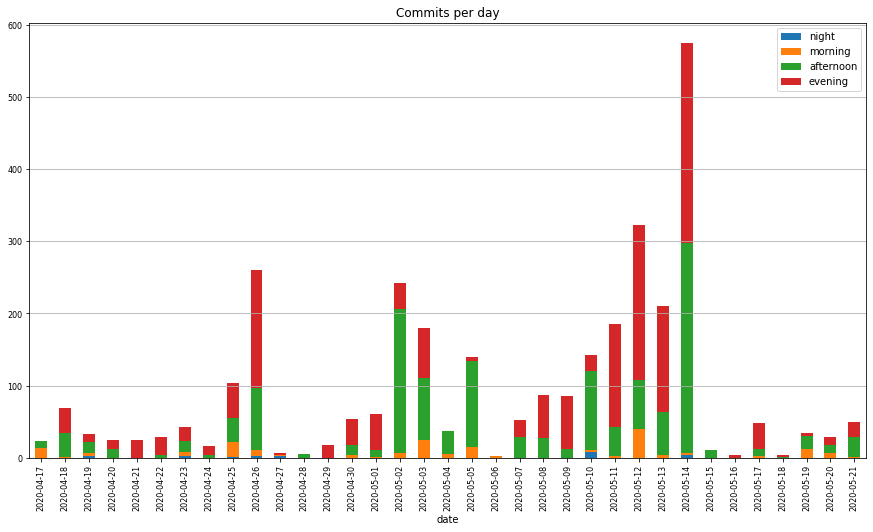

In [97]:
plot = df.plot.bar(fontsize=8, figsize=(15,8), title='Commits per day', x='date', rot= 90, stacked=True)
plot.yaxis.grid()

When do our users usually commit the labs: in the night, morning, afternoon,
or evening?
afternoon, evening

◦ Which day has:
∗ the most number of commits
∗ and at the same time the number of commits in the evening is higher than
in the afternoon?

12.05.2020

In [98]:
con.close()